In [1]:
%matplotlib inline
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# 0 eid
# 1 rid
# 2 qtot
# 3 qdom
# 4 prim_en
# 5 prim_time
# 6 prim_table_time
# 7 prim_table_charge
# 8 prim_pos
# 9 prim_dir
# 10 tau_en
# 11 tau_time
# 12 tau_table_time
# 13 tau_table_charge
# 14 tau_len
# 15 tau_pos
# 16 tau_dir
# 17 om.string
# 18 om.om
# 19 om_pos
# 20 start_time
# 21 wf_vect
# 22 wf_binwidth
c =0.299792458
n =1.3195
v=c/n 
print v

0.227201559682


In [4]:
d3 = pickle.load(open("DoublePulseWaveformDoubleBangs.pkl", "rb"))
print len(d3), len(d3[1]),len(d3[1][0]),len(d3[1][0][21])

3 756 23 128


In [5]:
for i in d3[:1]:
    for j in i:
        print j[19]

[-132.8000030517578, -501.45001220703125, -214.8000030517578]
[-132.8000030517578, -501.45001220703125, -248.83999633789062]
[-132.8000030517578, -501.45001220703125, -265.8599853515625]
[-132.8000030517578, -501.45001220703125, -282.8800048828125]
[-132.8000030517578, -501.45001220703125, -299.8999938964844]
[-132.8000030517578, -501.45001220703125, -316.9200134277344]
[-132.8000030517578, -501.45001220703125, -333.94000244140625]
[-132.8000030517578, -501.45001220703125, -350.9599914550781]
[-132.8000030517578, -501.45001220703125, -367.9800109863281]
[-132.8000030517578, -501.45001220703125, -385.0]
[-132.8000030517578, -501.45001220703125, -402.0299987792969]
[-132.8000030517578, -501.45001220703125, -419.04998779296875]
[-132.8000030517578, -501.45001220703125, -436.07000732421875]
[-132.8000030517578, -501.45001220703125, -453.0899963378906]
[-132.8000030517578, -501.45001220703125, -470.1099853515625]
[-132.8000030517578, -501.45001220703125, -487.1300048828125]
[-132.8000030517

In [6]:
def bang_time_shifts(one, one_dir, length, dom):
    if length > 0:
        l_x = np.sin(one_dir[0])*np.cos(one_dir[1])*length
        l_y = np.sin(one_dir[0])*np.sin(one_dir[1])*length
        l_z = np.cos(one_dir[0])*length
    two = [0,0,0]
    two[0] = one[0]-l_x 
    two[1] = one[1]-l_y 
    two[2] = one[2]-l_z 
    x_2 = (dom[0]-two[0])**2
    y_2 = (dom[1]-two[1])**2
    z_2 = (dom[2]-two[2])**2
    x_1 = (one[0]-dom[0])**2
    y_1 = (one[1]-dom[1])**2
    z_1 = (one[2]-dom[2])**2
    return ((x_1+y_1+z_1)**0.5)/v,((x_2+y_2+z_2)**0.5)/v
    #return two#one, l_z,l_y, l_z

In [7]:
def make_data(data):
    events = []
    for i in data:
        samples = []
        weight = []
        for j in i:
            wf = j[21]
            start = j[20]
            pos = j[19]
            wf_w = j[22]
            for i in wf:
                t = (start+wf.index(i)*wf_w)*v
                x = pos[0]
                y = pos[1]
                z = pos[2]
                samples.append([x,y,z,t])
                weight.append(i)
        events.append([samples, weight])
    return events

In [8]:
data = make_data(d3)

In [9]:
print len(data), len(data[0]),len(data[0][0]),len(data[0][1])

3 2 62208 62208


In [10]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(data[0][0])

In [25]:
split = zip(y_pred, data[0][0])
one_temp = [i[1] for i in split if i[0]==1]
two_temp = [i[1] for i in split if i[0]==0]
from operator import itemgetter
one = sorted(one_temp, key=itemgetter(3))
two = sorted(two_temp, key=itemgetter(3))

print len(split), len(one), len(two)
print one[0:3], two[0:3]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)
min_t = 0
max_t = 0
if one_t[0] < two_t[0]:
    min_t = one_t[0]
else:
    min_t = two_t[0]
    
if one_t[-1] > two_t[-1]:
    max_t = one_t[-1]
else:
    max_t = two_t[-1]
print min_t, max_t

62208 23973 38235
[[282.17999267578125, -325.739990234375, 38.880001068115234, 2272.468824219508], [282.17999267578125, -325.739990234375, 38.880001068115234, 2273.2260569657756], [282.17999267578125, -325.739990234375, 38.880001068115234, 2273.983289712044]] [[79.41000366210938, -248.24000549316406, -505.32000732421875, 2954.3230908358387], [79.41000366210938, -248.24000549316406, -505.32000732421875, 2955.080633292674], [79.41000366210938, -248.24000549316406, -505.32000732421875, 2955.8381757495094]]
23973 38235
2272.46882422 5270.42553831


In [1]:
from mpl_toolkits.mplot3d import Axes3D
for k in np.linspace(min_t,max_t,300):
    one_x_k  = [i[0] for i in one if i[3]<k]
    one_y_k  = [i[1] for i in one if i[3]<k]
    one_z_k  = [i[2] for i in one if i[3]<k]
    two_x_k  = [i[0] for i in two if i[3]<k]
    two_y_k  = [i[1] for i in two if i[3]<k]
    two_z_k  = [i[2] for i in two if i[3]<k]
    
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111, projection='3d')
    gr1 = ax.scatter(one_x_k, one_y_k, one_z_k, c='r', marker='.')
    gr2 = ax.scatter(two_x_k, two_y_k, two_z_k, c='b', marker='.')
    print dir(gr1) 
    name = "bang_1_{0}.png".format(k)
    #plt.savefig(name, dpi=300)
#ax.view_init(0, angle)


#fig2 = plt.figure(figsize=(6, 6))
#ax = fig2.add_subplot(311)
#ax.set_title("X vs t", fontsize = 14)
#ax.set_xlabel("Time, ns", fontsize = 14)                                                              
#ax.set_ylabel("X, m", fontsize = 14)
#ax.scatter(one_t, one_x, c='r', marker='.')
#ax.scatter(two_t, two_x, c='b', marker='.')
#ax = fig2.add_subplot(312)
#ax.set_title("Y vs t", fontsize = 14)
#ax.set_xlabel("Time, ns", fontsize = 14)                                                              
#ax.set_ylabel("Y, m", fontsize = 14)
#ax.scatter(one_t, one_y, c='r', marker='.')
#ax.scatter(two_t, two_y, c='b', marker='.')
#ax = fig2.add_subplot(313)
#ax.set_title("Z vs t", fontsize = 14)
#ax.set_xlabel("Time, ns", fontsize = 14)                                                              
#ax.set_ylabel("Z, m", fontsize = 14)
#ax.scatter(one_t, one_z, c='r', marker='.')
#ax.scatter(two_t, two_z, c='b', marker='.')
#plt.show()

NameError: name 'np' is not defined

In [54]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(data[1][0])

In [55]:
split = zip(y_pred, data[1][0])
one = [i[1] for i in split if i[0]==1]
two = [i[1] for i in split if i[0]==0]
print len(split), len(one), len(two)
print one[0], two[0]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)

96768 38807 57961
[411.80999755859375, 13.0, 76.22000122070312, 3251.493275591299] [248.14999389648438, -111.87000274658203, -335.9800109863281, 3616.0312612339994]
38807 57961


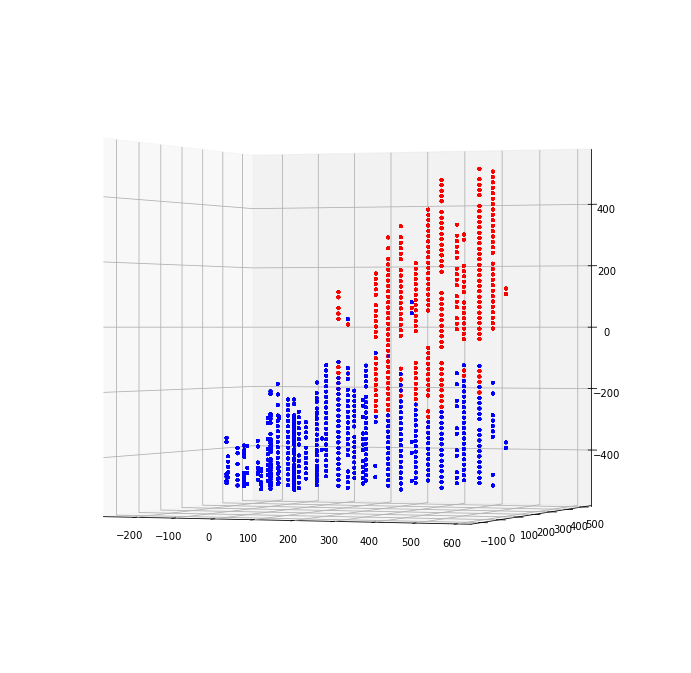

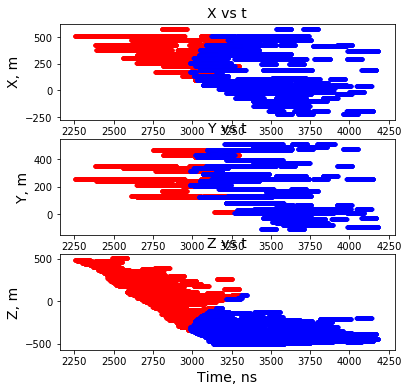

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z, c='r', marker='.')
ax.scatter(two_x, two_y, two_z, c='b', marker='.')
ax.view_init(0, angle)
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot(311)
ax.set_title("X vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("X, m", fontsize = 14)
ax.scatter(one_t, one_x, c='r', marker='.')
ax.scatter(two_t, two_x, c='b', marker='.')
ax = fig2.add_subplot(312)
ax.set_title("Y vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Y, m", fontsize = 14)
ax.scatter(one_t, one_y, c='r', marker='.')
ax.scatter(two_t, two_y, c='b', marker='.')
ax = fig2.add_subplot(313)
ax.set_title("Z vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Z, m", fontsize = 14)
ax.scatter(one_t, one_z, c='r', marker='.')
ax.scatter(two_t, two_z, c='b', marker='.')
plt.show()

In [57]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(data[2][0])

In [58]:
split = zip(y_pred, data[2][0])
one = [i[1] for i in split if i[0]==1]
two = [i[1] for i in split if i[0]==0]
print len(split), len(one), len(two)
print one[0], two[0]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)

154496 42660 111836
[210.47000122070312, -209.77000427246094, -132.82000732421875, 3443.138693429976] [-132.8000030517578, -501.45001220703125, -265.8599853515625, 4150.066780025214]
42660 111836


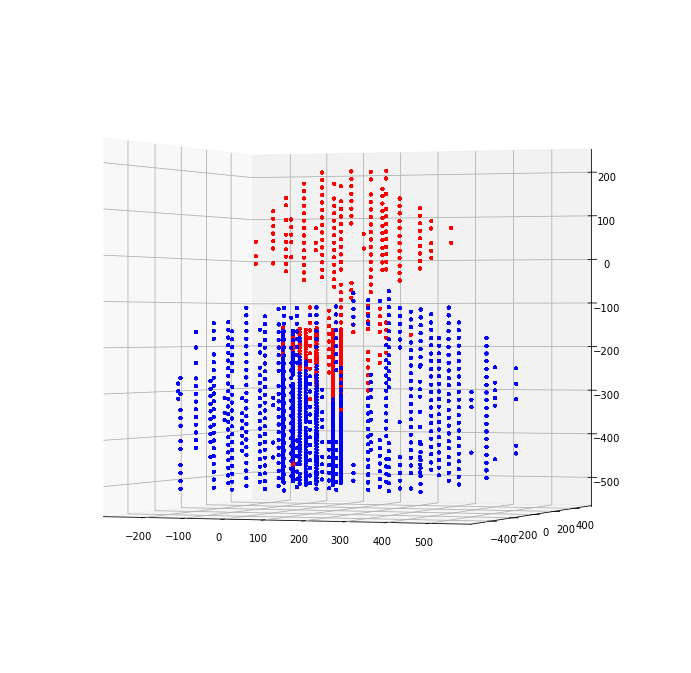

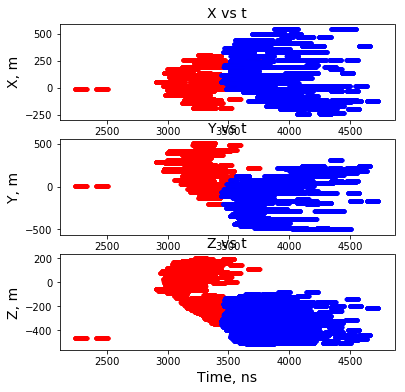

In [59]:

fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z, c='r', marker='.')
ax.scatter(two_x, two_y, two_z, c='b', marker='.')
ax.view_init(0, angle)
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot(311)
ax.set_title("X vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("X, m", fontsize = 14)
ax.scatter(one_t, one_x, c='r', marker='.')
ax.scatter(two_t, two_x, c='b', marker='.')
ax = fig2.add_subplot(312)
ax.set_title("Y vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Y, m", fontsize = 14)
ax.scatter(one_t, one_y, c='r', marker='.')
ax.scatter(two_t, two_y, c='b', marker='.')
ax = fig2.add_subplot(313)
ax.set_title("Z vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Z, m", fontsize = 14)
ax.scatter(one_t, one_z, c='r', marker='.')
ax.scatter(two_t, two_z, c='b', marker='.')
plt.show()

In [86]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters=2).fit_predict(data[0][0])

In [87]:
for i in y_pred:
    #if not i==-1:
    print i

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [88]:
split = zip(y_pred, data[0][0])
one = [i[1] for i in split if i[0]==1]
two = [i[1] for i in split if i[0]==0]
print len(split), len(one), len(two)
print one[0], two[0]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)

62208 9190 53018
[237.77999877929688, -442.4200134277344, 92.97000122070312, 2478.7827372317934] [-132.8000030517578, -501.45001220703125, -214.8000030517578, 3434.1888259166735]
9190 53018


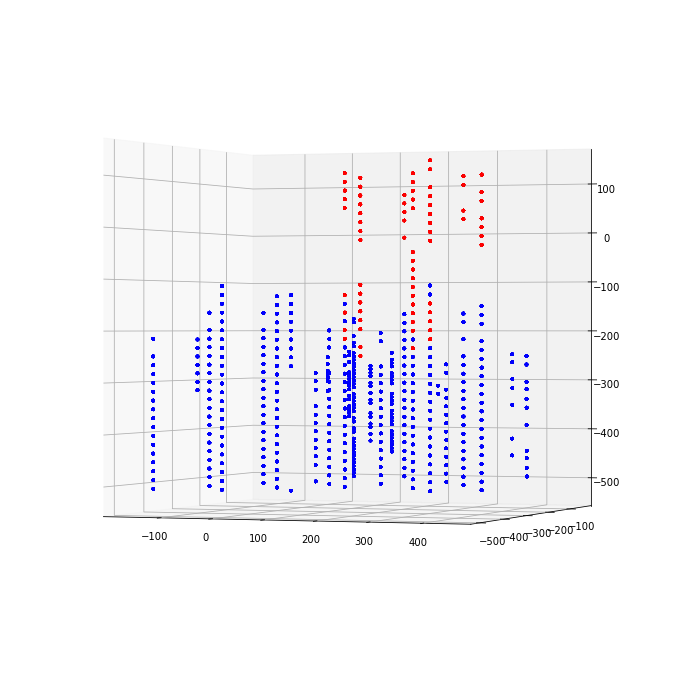

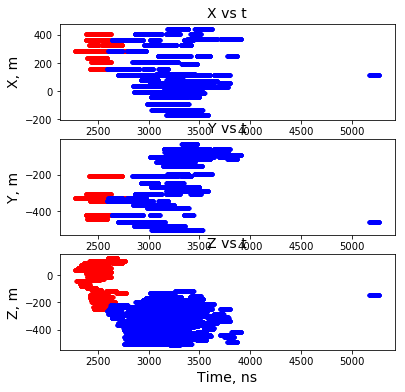

In [89]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z, c='r', marker='.')
ax.scatter(two_x, two_y, two_z, c='b', marker='.')
ax.view_init(0, angle)
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot(311)
ax.set_title("X vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("X, m", fontsize = 14)
ax.scatter(one_t, one_x, c='r', marker='.')
ax.scatter(two_t, two_x, c='b', marker='.')
ax = fig2.add_subplot(312)
ax.set_title("Y vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Y, m", fontsize = 14)
ax.scatter(one_t, one_y, c='r', marker='.')
ax.scatter(two_t, two_y, c='b', marker='.')
ax = fig2.add_subplot(313)
ax.set_title("Z vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Z, m", fontsize = 14)
ax.scatter(one_t, one_z, c='r', marker='.')
ax.scatter(two_t, two_z, c='b', marker='.')
plt.show()

In [90]:
y_pred = Birch(n_clusters=2).fit_predict(data[1][0])

In [92]:
split = zip(y_pred, data[1][0])
one = [i[1] for i in split if i[0]==1]
two = [i[1] for i in split if i[0]==0]
print len(split), len(one), len(two)
print one[0], two[0]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)

96768 25290 71478
[330.0299987792969, 127.19999694824219, 313.6400146484375, 2733.0300173142236] [248.14999389648438, -111.87000274658203, -335.9800109863281, 3616.0312612339994]
25290 71478


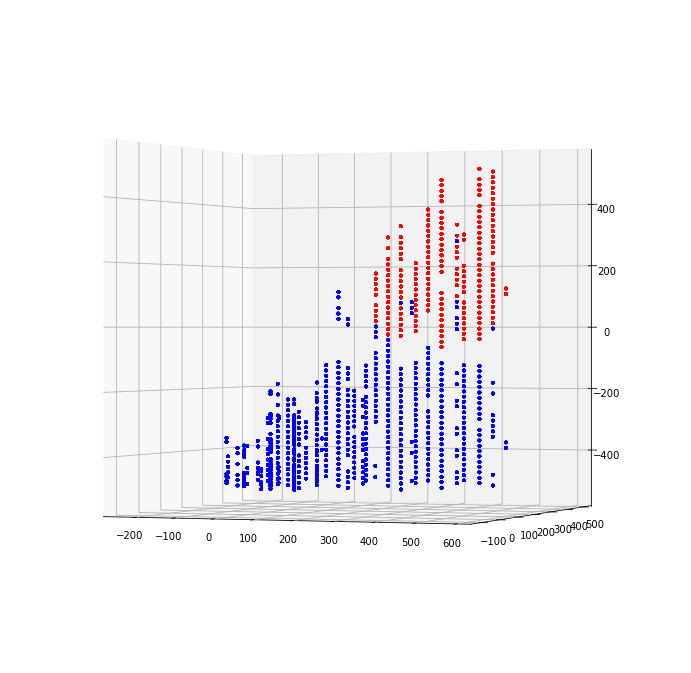

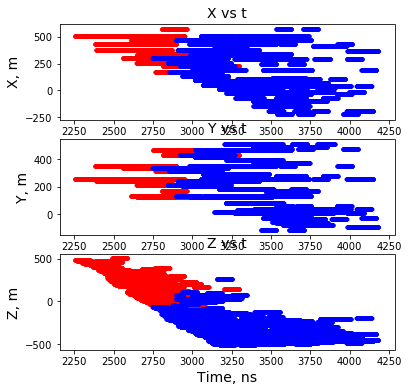

In [ ]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z, c='r', marker='.')
ax.scatter(two_x, two_y, two_z, c='b', marker='.')
ax.view_init(0, angle)
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot(311)
ax.set_title("X vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("X, m", fontsize = 14)
ax.scatter(one_t, one_x, c='r', marker='.')
ax.scatter(two_t, two_x, c='b', marker='.')
ax = fig2.add_subplot(312)
ax.set_title("Y vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Y, m", fontsize = 14)
ax.scatter(one_t, one_y, c='r', marker='.')
ax.scatter(two_t, two_y, c='b', marker='.')
ax = fig2.add_subplot(313)
ax.set_title("Z vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Z, m", fontsize = 14)
ax.scatter(one_t, one_z, c='r', marker='.')
ax.scatter(two_t, two_z, c='b', marker='.')
plt.show()

In [ ]:
y_pred = Birch(n_clusters=2).fit_predict(data[2][0])

In [ ]:
split = zip(y_pred, data[2][0])
one = [i[1] for i in split if i[0]==1]
two = [i[1] for i in split if i[0]==0]
print len(split), len(one), len(two)
print one[0], two[0]
one_x = [i[0] for i in one]
one_y = [i[1] for i in one]
one_z = [i[2] for i in one]
one_t = [i[3] for i in one]
two_x = [i[0] for i in two]
two_y = [i[1] for i in two]
two_z = [i[2] for i in two]
two_t = [i[3] for i in two]
print len(one_x), len(two_x)

In [ ]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z, c='r', marker='.')
ax.scatter(two_x, two_y, two_z, c='b', marker='.')
ax.view_init(0, angle)
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot(311)
ax.set_title("X vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("X, m", fontsize = 14)
ax.scatter(one_t, one_x, c='r', marker='.')
ax.scatter(two_t, two_x, c='b', marker='.')
ax = fig2.add_subplot(312)
ax.set_title("Y vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Y, m", fontsize = 14)
ax.scatter(one_t, one_y, c='r', marker='.')
ax.scatter(two_t, two_y, c='b', marker='.')
ax = fig2.add_subplot(313)
ax.set_title("Z vs t", fontsize = 14)
ax.set_xlabel("Time, ns", fontsize = 14)                                                              
ax.set_ylabel("Z, m", fontsize = 14)
ax.scatter(one_t, one_z, c='r', marker='.')
ax.scatter(two_t, two_z, c='b', marker='.')
plt.show()